# XGBoost

In [1]:
# Bloc non affiché

import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score, matthews_corrcoef, make_scorer


from xgboost import XGBClassifier
from xgboost import plot_importance


from sklearn.model_selection import GridSearchCV



def result_model(model,X,Y) :
    Y_model =model.predict(X)

    f1_scor = f1_score(Y,Y_model)
    print('Le f1 score vaut',f1_scor)
    
    
   # Matrice de confusion
    cm_model = confusion_matrix(Y, Y_model)
    plt.rcParams['figure.figsize'] = (5, 5)
    sns.heatmap(cm_model, annot = True)
    plt.title(str(model))
    plt.show()
    
    return(f1_scor)

## Téléchargement des données

In [2]:
train = pd.read_csv("https://www.data.mclavier.com/prj_datascience/train_v1.csv")

## Pre-processing

On sépare dans un premier temps les variables explicatives et la variable à expliquer.

In [3]:
# Décomposition features / target
X = train.drop(columns='Response')
Y = train['Response']

Ensuite, on décompose en bdd train et test puis on scale les données grâce à sklearn.

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.9)

scaler=StandardScaler() 

X_scal_train = scaler.fit_transform(X_train)
X_scal_test = scaler.transform(X_test) 

X_scal_train = pd.DataFrame(X_scal_train,index= X_train.index, columns=X.columns)
X_scal_test = pd.DataFrame(X_scal_test,index= X_test.index, columns=X.columns)

Le modèle final sera entrainé sur l'intégralité de la base que nous possédons. Mais actuellement, nous souhaitons mesure le caractère prédictif de nos données et donc pour éviter l'overfitting, nous séparons tout de même nos données.

## Implémentation

In [20]:
xgb0 = XGBClassifier(use_label_encoder=False)
xgb0.fit(X_train, Y_train)

[11:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

Le f1 score vaut 0.3964879852125693


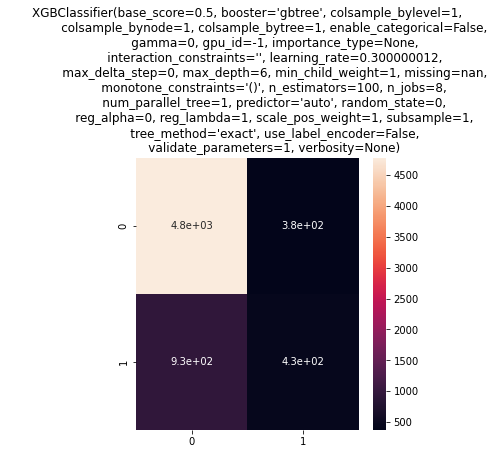

In [21]:
result_model(xgb0, X_test, Y_test)

## Tuning

Pour tuner le programme, on s'inspire grandement de [ce site](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/#h2_9).
Nous utilisons la fonction GridSearchCV de *sklearn*.

In [ ]:
from sklearn.model_selection import GridSearchCV  

In [53]:
# Bloc non affiché

#Import libraries:
import numpy as np
import pandas as pd

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [37]:
target = 'Response'
predictors = [x for x in train.columns if x not in [target]]



def modelfit(alg, dtrain, predictors, useTrainCV = True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    # dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    print("\nMesures :")
    print("---------")
    print("Accuracy : ", accuracy_score(dtrain[target].values, dtrain_predictions))
    print("f1 : ", f1_score(dtrain[target].values, dtrain_predictions))


    plot_importance(xgb1)
    plt.show()

Dans un premier temps, on récupère les paramètres de bases que l'on va tuner par la suite.

In [38]:
params = xgb0.get_xgb_params()

### Étape 1 : Initialisation

On modifie quelques paramètres de base au regard des TP réalisés.

In [39]:
params['seed'] = 27
params['nthread'] = 7
params["use_label_encoder"] = False
params["n_estimators"] = 1000


Mesures :
---------
Accuracy :  0.809403849403235
f1 :  0.3475654642969818


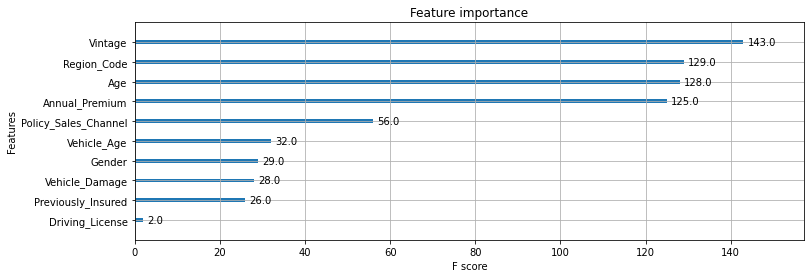

In [40]:
xgb1 = XGBClassifier(**params)

modelfit(xgb1, train, predictors)

### Étape 2 : max_depth et min_child_weight

Lors du tuning, nous diminuons le nombre d'estimators pour réduire le temps de calcul

In [41]:
params["n_estimators"] = 140

On tune max_depth et min_child_weight

In [42]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6)
}

Nous utilisons l'outil gsearch de *sklearn* pour tester différents paramètres en ayant comme mesure de scoring le F1-Score. Voici l'implémentation qui sera masquée par la suite.

In [43]:
gsearch1 = GridSearchCV(
    estimator = XGBClassifier(**params),
    param_grid = param_test1, scoring='f1', n_jobs=4, cv=5)
 
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=140, n_jobs=8, nthread=7,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, subs

On récupère les paramètres optimaux identifiés.

In [44]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 5}, 0.4024780585914988)

Nous pouvons modifier *min_child_weight* dans les paramètres.

In [46]:
params["max_depth"] = 9
params["min_child_weight"] = 5

Étant à la limite sur les deux paramètres, nous testons avec des paramètres plus forts.

In [48]:
param_test2 = {
'max_depth':[9, 20, 45, 50, 75],
'min_child_weight':[5, 10, 20]
}

gsearch2 = GridSearchCV(
                estimator = XGBClassifier(**params),
                param_grid = param_test2, scoring='f1',n_jobs=4,cv=5)

gsearch2.fit(train[predictors],train[target])

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=9,
                                     min_child_weight=5, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=140, n_jobs=8, nthread=7,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, subs

In [49]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 50, 'min_child_weight': 5}, 0.41722053132398057)

Si on est à une valeur optimale on peut tester plus haut

In [50]:
params["max_depth"] = 50

In [51]:
param_test2b = {
    'max_depth':[45, 50, 55],
}

In [52]:
gsearch2b = GridSearchCV(
                estimator = XGBClassifier(**params), 
                param_grid = param_test2b, scoring='f1',n_jobs=4, cv=5)

gsearch2b.fit(train[predictors],train[target])

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=50,
                                     min_child_weight=5, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=140, n_jobs=8, nthread=7,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, sub

In [55]:
gsearch2b.best_params_, gsearch2b.best_score_

({'max_depth': 50}, 0.41722053132398057)

On conserve donc max_depth = 50.

### Étape 3 : Gamma

Maintenant, nous répétons le même mécanisme pour le paramètre *Gamma*.

1. Définir les valeurs de Gamma à tester
2. Utiliser GridSearchCV
3. Choisir de conserver, modifier, ou d'affiner encore Gamma.

In [57]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

In [58]:
gsearch3 = GridSearchCV(estimator = XGBClassifier(**params), 
                        param_grid = param_test3, scoring='f1',n_jobs=4, cv=5)

gsearch3.fit(train[predictors],train[target])

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=50,
                                     min_child_weight=5, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=140, n_jobs=8, nthread=7,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, sub

In [59]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.0}, 0.41722053132398057)

Nous ne modifions pas *Gamma* et laissons le paramètre à 0.

Avant de continuer, nous ré-augmentons n_estimators pour voir où est le modèle si nous augmentons le nombre de boosting rounds.


Mesures :
---------
Accuracy :  0.8635658438426445
f1 :  0.6138260869565217


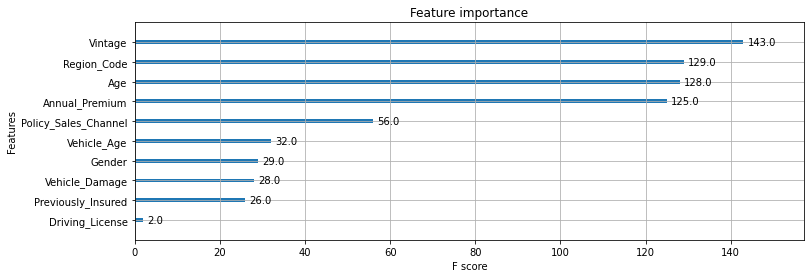

In [61]:
params["n_estimators"] = 1000
xgb2 = XGBClassifier(**params)
modelfit(xgb2, train, predictors)

### Etape 4 : subsample et colsample_bytree

Nous rétablissons *n_estimators* pour la puissance de calcul.

In [62]:
params["n_estimators"] = 140

Génération des paramètres à tester :

In [63]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

In [64]:
gsearch4 = GridSearchCV(
    estimator = XGBClassifier(**params), 
    param_grid = param_test4, scoring='f1',n_jobs=4, cv=5)
    
gsearch4.fit(train[predictors],train[target])

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=50,
                                     min_child_weight=5, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=140, n_jobs=8, nthread=7,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, sub

In [65]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.7}, 0.42095524066535334)

Nous modifions les paramètres identifiés

In [68]:
params["subsample"] = 0.7
params["colsample_bytree"] = 0.9

Nous affinons les tests sur ces paramètres.

In [70]:
param_test5 = {
 'subsample':[i/100.0 for i in range(65,80,5)],
 'colsample_bytree':[i/100.0 for i in range(85,100,5)]
}

In [71]:
gsearch5 = GridSearchCV(
                estimator = XGBClassifier(**params), 
                param_grid = param_test5, scoring='f1',n_jobs=4, cv=5)

gsearch5.fit(train[predictors],train[target])

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.9,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=50,
                                     min_child_weight=5, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=140, n_jobs=8, nthread=7,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, s

In [73]:
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.7}, 0.42095524066535334)

Cela confirme les valeurs 0.9 et 0.7 trouvées précédemment.

### Étape 5 : reg_alpha

Prochaine étape : optimisation de *reg_alpha*.

In [77]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

In [78]:
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=50,
                                 min_child_weight=4, gamma=0.1, subsample=0.8, colsample_bytree=0.9,
                                 objective= 'binary:logistic', nthread=7, scale_pos_weight=1,seed=27), 
                        param_grid = param_test6, scoring='f1',n_jobs=4, cv=5)
gsearch6.fit(train[predictors],train[target])

C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9,
                                     enable_categorical=False, gamma=0.1,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=50, min_child_weight=4,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=177, n_jobs=None, nthread=7,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_wei

In [80]:
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 1e-05}, 0.41076480565646045)

On modifie le paramètre.

In [81]:
params["reg_alpha"] = 1e-5

Avant de continuer, nous ré-augmentons n_estimators pour voir où est le modèle si nous augmentons le nombre de boosting rounds.


Mesures :
---------
Accuracy :  0.8651326400516121
f1 :  0.6105048354183302


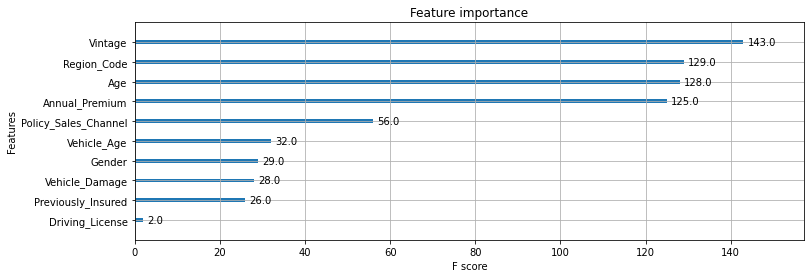

In [82]:
params["n_estimators"] = 1000
xgb3 = XGBClassifier(**params)
modelfit(xgb3, train, predictors)

### Etape 6 : Learning rate

Enfin, nous essayons de diminuer le *learning_rate* et d'augmenter grandement les *n_estimators*.

In [87]:
params["n_estimators"] = 5000
params["learning_rate"] = 0.01


Mesures :
---------
Accuracy :  0.8634275971183238
f1 :  0.5663984394050231


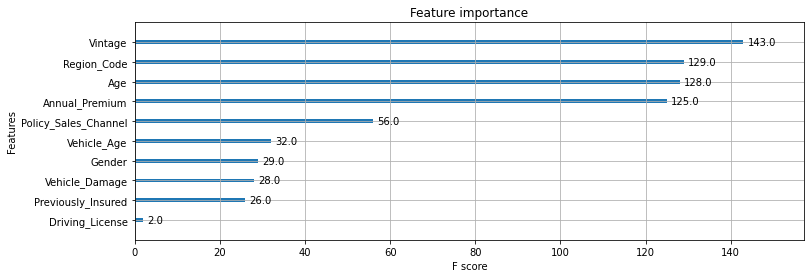

In [88]:
xgb4 = XGBClassifier(**params)
modelfit(xgb4, train, predictors)

Le F1-Score ne s'améliore pas, nous revenons aux anciens paramètres.

In [90]:
params["n_estimators"] = 1000
params["learning_rate"] = 0.1

## Paramètres finaux

Au final, les paramètres obtenus sont :

In [91]:
params

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.9,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 50,
 'min_child_weight': 5,
 'monotone_constraints': '()',
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 1e-05,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.7,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'seed': 27,
 'nthread': 7,
 'use_label_encoder': False,
 'n_estimators': 1000}

Nous reprendons ces paramètres dans le prochains notebook concernant le modèle final utilisé pour générer les prédictions sur la base test.

## Conclusion

Tuner un modèle XGBoost nécessite énormement de temps de calcul. Dans ce projet, nous avons restreint le nombre de paramètres. Bien sûr, avec davantage de puissance, nous aurions pu calibrer plus précisement les paramètres étudiés et tuner d'autres paramètres non traités dans ce notebook.

<br><br><br><br><br>